# Variations in the xy-plane

*This notebook explores the variations in the xy-plane.*

Recall that each build contains eight 'anchors', i.e. specimen **not** included in the main study. These anchors are specimen rotated -90 degrees about the x-axis. All builds contain 45 defined positions in a 3x3x5 grid as displayed in the figure below. The anchors are found at **(2,3,z)** for all layers, and at **(3,1,z)** for layers 1, 3 and 5.


<img src="figs/layout_positions.png" width="600"/>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import my_functions as func

In [4]:
"""
Retrieve all the data and sort it into a dictionary where each entry is a separate characteristic.

Key:   Name of the characteristic.
Value: DataFrame containing the measured values and the layout data.

"""

# Initiate a dictionary with characteristics and layout information
char_dict = func.make_char_dict()

## Cylindricity

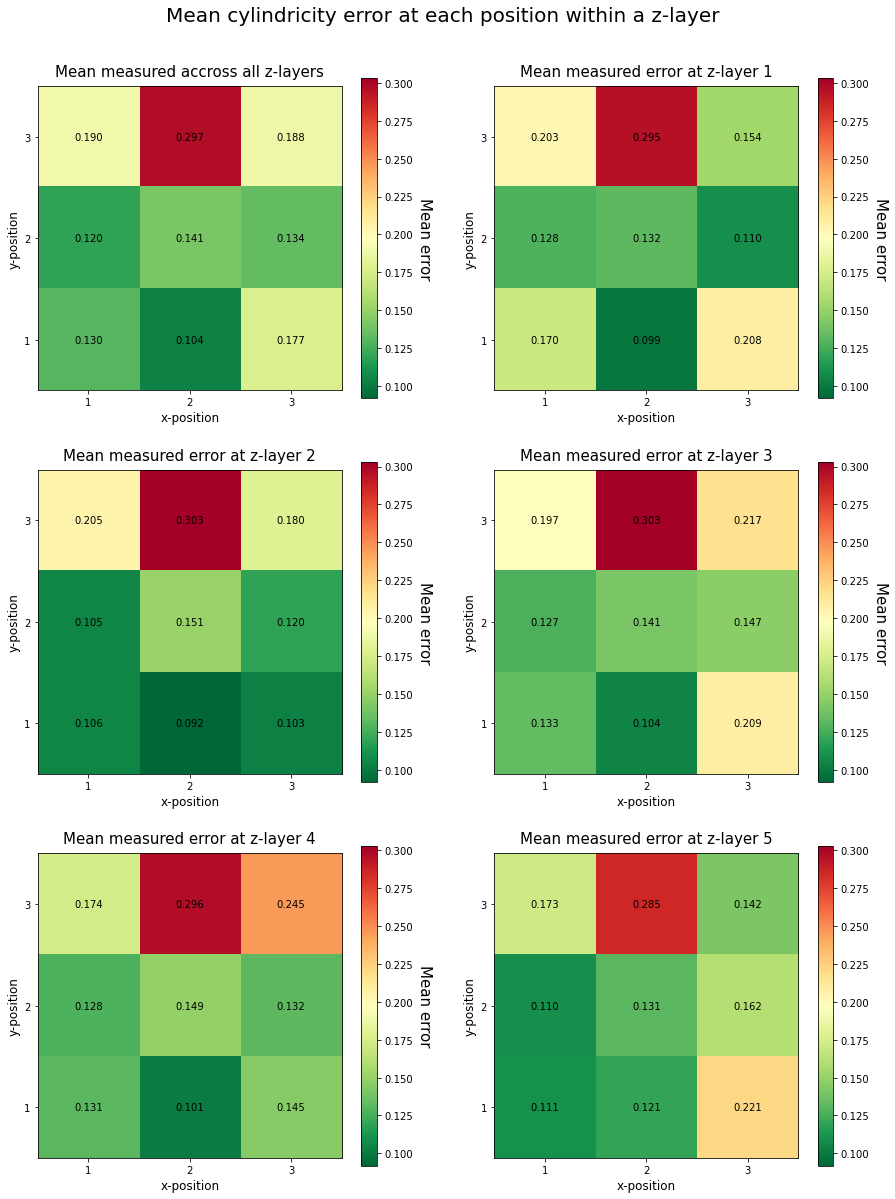

In [5]:
## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Concatinate dataframes
df = pd.concat(dfs)

# Isolate the necessary columns
df = df[['error', 'x_pos', 'y_pos', 'z_pos']]


## Create figure
# Initialize figure as a grid of plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Set figure title
fig.suptitle('Mean cylindricity error at each position within a z-layer', y=0.93, fontsize=20)

# Set colormap-palette
cmap = "RdYlGn_r"

# Define the maximum and minimum values of the colormap (hard-coded from results)
vmin = 0.092
vmax = 0.303

# Initialzie an empty matrix to represent the error values of a layer
matrix = np.zeros((3, 3))


## Plot the z-layers separately
for z in range(1,6):
    
    # Calculate coordinates for plot
    i = int(z/2)
    j = z%2
    
    # Fill out layer matrix
    for y in range(1,4):
        for x in range(1,4):
            temp = df[(df['z_pos'] == z) & (df['y_pos'] == y) & (df['x_pos'] == x)]
            matrix[y-1, x-1] = temp['error'].mean()
    
    # Flip matrix to fit with the layout decription
    matrix = np.flip(m=matrix, axis=0)
    
    # Create heatmap from matrix
    im = axs[i, j].imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax)
    
    # Add annotation to the heatmap
    for y in range(1,4):
        for x in range(1,4):
            axs[i, j].text(x-1, y-1, "{:.3f}".format(matrix[y-1, x-1]),
                    ha="center", va="center", color="black")
            
    axs[i, j].set_xticks([0, 1, 2])
    axs[i, j].set_yticks([0, 1, 2])
    
    axs[i, j].set_xticklabels([1, 2, 3])
    axs[i, j].set_yticklabels([3, 2, 1])
    
    axs[i, j].set_title("Mean measured error at z-layer {}".format(z), fontsize=15, pad=10)
    
    axs[i, j].set_xlabel("x-position", fontsize=12)
    axs[i, j].set_ylabel("y-position", fontsize=12)

    cbar = axs[i, j].figure.colorbar(im, ax=axs[i, j])
    cbar.ax.set_ylabel("Mean error", rotation=-90, va="bottom", fontsize=15)

# Prepare data for a 'total'-plot
for y in range(1,4):
    for x in range(1,4):
            temp = df[(df['y_pos'] == y) & (df['x_pos'] == x)]
            matrix[y-1, x-1] = temp['error'].mean()
    
    # Flip matrix to fit with the layout decription
    matrix = np.flip(m=matrix, axis=0)
    
# Plot the 'total' in the first square
axs[0, 0].imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax)

for y in range(1,4):
    for x in range(1,4):
        axs[0, 0].text(x-1, y-1, "{:.3f}".format(matrix[y-1, x-1]),
                ha="center", va="center", color="black")

        
axs[0, 0].set_xticks([0, 1, 2])
axs[0, 0].set_yticks([0, 1, 2])

axs[0, 0].set_xticklabels([1, 2, 3])
axs[0, 0].set_yticklabels([3, 2, 1])

axs[0, 0].set_title("Mean measured accross all z-layers", fontsize=15, pad=10)

axs[0, 0].set_xlabel("x-position", fontsize=12)
axs[0, 0].set_ylabel("y-position", fontsize=12)

    
cbar = axs[0, 0].figure.colorbar(im, ax=axs[0, 0])
cbar.ax.set_ylabel("Mean error", rotation=-90, va="bottom", fontsize=15)


plt.show()

<AxesSubplot:xlabel='z_pos', ylabel='error'>

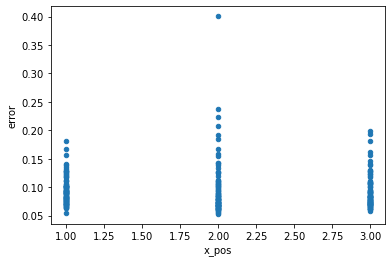

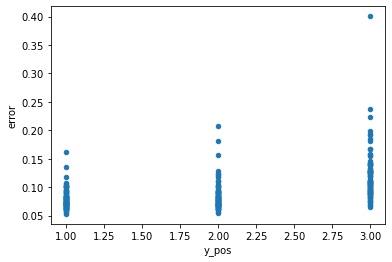

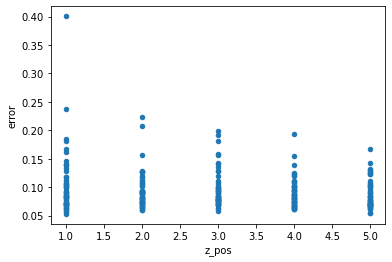

In [6]:
## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2', 'Flatness_HX2_Plane5']

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Concatinate dataframes
df = pd.concat(dfs)

# Extract those rotated 10 degrees
df_new = df

# Isolate the necessary columns
df_new = df_new[['error', 'x_pos', 'y_pos', 'z_pos']]

df_new.plot.scatter(x='x_pos', y='error')
df_new.plot.scatter(x='y_pos', y='error')
df_new.plot.scatter(x='z_pos', y='error')

Low limit: -0.013901207684529723
High limit: 0.20299685670323153
                                Flatness_HX2_Plane2 Flatness_HX2_Plane5
char                type                                               
Flatness_HX2_Plane2 T-statistic                 NaN           -0.775411
                    P-value                     NaN            0.438791
Flatness_HX2_Plane5 T-statistic            0.775411                 NaN
                    P-value                0.438791                 NaN


,error,build,char,part_index,x_pos,y_pos,z_pos,angle,center_x,center_y,center_z
5,0.207032,1,Flatness_HX2_Plane2,14,2,2,2,75,170,170,150.60
8,0.222995,1,Flatness_HX2_Plane2,17,2,3,2,-90,170,270,150.60
43,0.237748,1,Flatness_HX2_Plane2,8,2,3,1,-90,170,270,50.88
178,0.400476,1,Flatness_HX2_Plane5,8,2,3,1,-90,170,270,50.88


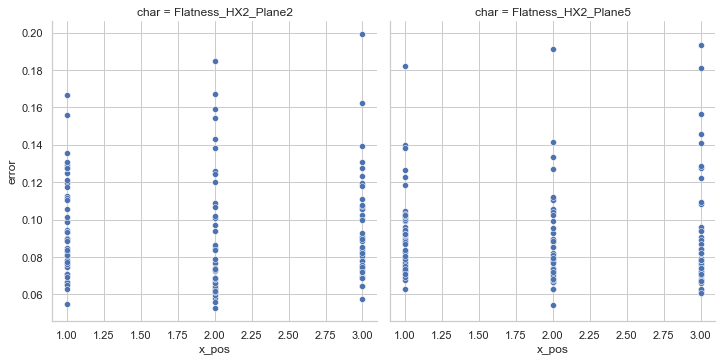

In [7]:
"""
Compare flatness of vertical planes at different positions in the xy-plane

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2', 'Flatness_HX2_Plane5']

# Retrieve the characteristics from the dictionary
df1 = char_dict['Flatness_HX2_Plane2']
df1.insert(loc=2, column='char', value='Flatness_HX2_Plane2')

df2 = char_dict['Flatness_HX2_Plane5']
df2.insert(loc=2, column='char', value='Flatness_HX2_Plane5')

# Concatinate dataframes
df = pd.concat([df1, df2])


## Filter data
# Remove outliers
std = df['error'].std()

hi_lim = df['error'].mean() + (3*std)
lo_lim = df['error'].mean() - (3*std)

df_filtered = df[(df['error'] < hi_lim) & (df['error'] > lo_lim)]

df_removed = pd.merge(df, df_filtered, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])


## Create figure
sns.set_theme(style="whitegrid")

g = sns.relplot(data=df_filtered, x='x_pos', y='error', col='char')

print("Low limit: {}\nHigh limit: {}".format(lo_lim, hi_lim))
print(func.my_t_test(df_filtered, par='char'))

df_removed.head()


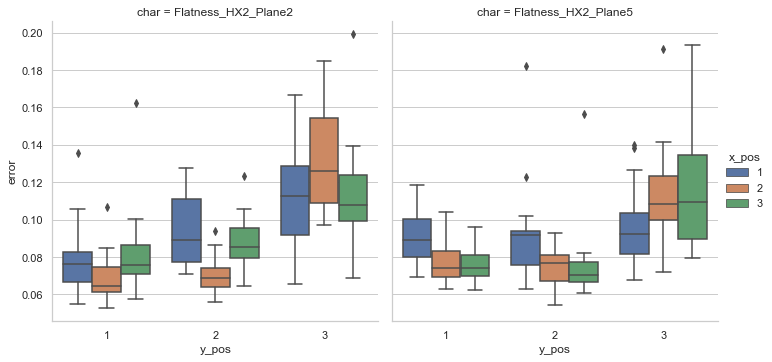

In [8]:
ax = sns.catplot(x='y_pos', y='error', hue='x_pos', col='char', data=df_filtered, kind='box')

In [9]:
# T-test for y-positions
func.my_t_test(df, 'y_pos')

1           2            3
y_pos type                                             
1     T-statistic          NaN      1.6849      8.02437
      P-value              NaN    0.093761  1.32749e-13
2     T-statistic      -1.6849         NaN       6.5767
      P-value         0.093761         NaN   5.1688e-10
3     T-statistic     -8.02437     -6.5767          NaN
      P-value      1.32749e-13  5.1688e-10          NaN

In [10]:
# T-test for x-positions
func.my_t_test(df, 'x_pos')

1         2         3
x_pos type                                     
1     T-statistic       NaN  0.408894 -0.525604
      P-value           NaN  0.683109  0.599817
2     T-statistic -0.408894       NaN -0.735916
      P-value      0.683109       NaN  0.462751
3     T-statistic  0.525604  0.735916       NaN
      P-value      0.599817  0.462751       NaN

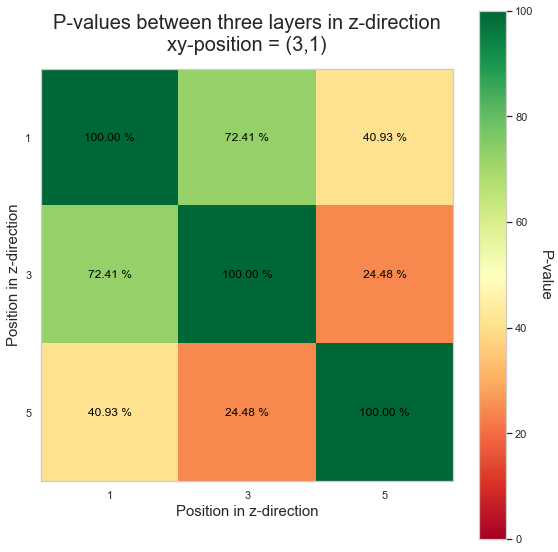

In [11]:
"""
Conduct T-test between all combinations of x-positions.

Only consider the planes 2 and 5 of HX2 because they are vertical for all orientations.

"""

## Retrieve and format data
# List of characteristics
chars = ['Flatness_HX2_Plane2', 'Flatness_HX2_Plane5']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Concatenate dataframes
df = pd.concat(df)

# Isolate the position of the specimen
df = df[(df['x_pos'] == 3) & (df['y_pos'] == 1) & (df['angle'] == -90)]

# Extract columns of interest
df = df[['error', 'z_pos']]

# Conuct T-test and store P-values
df_p_vals = func.get_p_vals(df)

# Replace NA-values with ones and multiply show percent
df_p_vals.fillna(1, inplace=True)
df_p_vals = df_p_vals.applymap(lambda x: x*100)

# Set labels for all ticks
x_labels = df_p_vals.columns
y_labels = df_p_vals.index

# Set colormap-palette
cmap = "RdYlGn"

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(df_p_vals, cmap=cmap, vmin=0, vmax=100)
ax.grid(False)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("P-value", rotation=-90, va="bottom", fontsize=15)

# Show all ticks
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))

# Label ticks according to table
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Label the axes
ax.set_xlabel('Position in z-direction', fontsize=15)
ax.set_ylabel('Position in z-direction', fontsize=15)

# Give title for plot
ax.set_title('P-values between three layers in z-direction\n'+\
            'xy-position = (3,1)', fontsize=20, pad=18)

# Loop over data dimensions and create text annotations.
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        ax.text(j, i, "{:.2f} %".format(df_p_vals.iloc[i,j]),
               ha="center", va="center", color="black")
    
fig.tight_layout()
plt.show()

In [12]:
## Retrieve and format data
# List of characteristics
chars = ['Flatness_HX2_Plane2', 'Flatness_HX2_Plane3', 'Flatness_HX2_Plane5']

# Retrieve the characteristics from the dictionary
#df = pd.concat([char_dict['Flatness_HX2_Plane2'], char_dict['Flatness_HX2_Plane5']])

df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

df.char.unique()

C:\Users\torbjsle\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


array(['Flatness_HX2_Plane2', nan, 'Flatness_HX2_Plane5'], dtype=object)